In [3]:
import numpy as np
import pandas as pd
import missingno as msno
import warnings
import openpyxl
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel("dataset.xlsx")

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,745.661610,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
1,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
2,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,4019.410836,0.883543,-1.085240,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
3,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
4,5,L51841,L,303.3,311.3,1350,48.1,32,1,Heat Dissipation Failure,...,1639.657411,0.697170,-1.603008,0,0.022523,1.466719,0.595474,0.236426,0.012031,-0.409779


In [6]:
df.drop("UDI", axis=1, inplace=True)


In [7]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,operational_hours,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,4231,745.661610,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
1,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,440,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
2,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,944,4019.410836,0.883543,-1.085240,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
3,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,4576,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
4,L51841,L,303.3,311.3,1350,48.1,32,1,Heat Dissipation Failure,3362,1639.657411,0.697170,-1.603008,0,0.022523,1.466719,0.595474,0.236426,0.012031,-0.409779


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],696.0,300.487069,2.022437,295.600000,298.775000,300.600000,302.225000,304.400000
Process temperature [K],696.0,310.226437,1.424500,306.100000,309.100000,310.350000,311.200000,313.700000
Rotational speed [rpm],696.0,1512.379310,288.261142,1181.000000,1356.000000,1426.500000,1564.000000,2886.000000
Torque [Nm],696.0,45.056322,14.175301,3.800000,36.425000,46.100000,54.925000,76.600000
Tool wear [min],696.0,123.829023,70.614555,0.000000,64.000000,127.000000,192.000000,253.000000
Target,696.0,0.474138,0.499690,0.000000,0.000000,0.000000,1.000000,1.000000
operational_hours,696.0,2618.890805,1406.915802,118.000000,1392.000000,2665.000000,3835.000000,4995.000000
RUL,696.0,2342.113825,1407.522819,-24.848123,1112.224743,2289.584036,3569.338725,4841.729779
Vibration (mm/s),696.0,0.021720,1.016220,-1.729951,-0.860757,0.038385,0.865448,1.731966
Pressure (Pa),696.0,-0.033499,0.977088,-1.731001,-0.873398,-0.066884,0.798796,1.706937


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               696 non-null    object 
 1   Type                     696 non-null    object 
 2   Air temperature [K]      696 non-null    float64
 3   Process temperature [K]  696 non-null    float64
 4   Rotational speed [rpm]   696 non-null    int64  
 5   Torque [Nm]              696 non-null    float64
 6   Tool wear [min]          696 non-null    int64  
 7   Target                   696 non-null    int64  
 8   Failure Type             696 non-null    object 
 9   operational_hours        696 non-null    int64  
 10  RUL                      696 non-null    float64
 11  Vibration (mm/s)         696 non-null    float64
 12  Pressure (Pa)            696 non-null    float64
 13  Maintenance Required     696 non-null    int64  
 14  Temp_Change              6

In [10]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'operational_hours', 'RUL', 'Vibration (mm/s)',
       'Pressure (Pa)', 'Maintenance Required', 'Temp_Change', 'Vib_Change',
       'Temperature_Mean', 'Vibration_Mean', 'Pressure_Mean', 'RPM_Mean'],
      dtype='object')

In [11]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Product ID,696,696,L56106,1
Type,696,3,L,442
Failure Type,696,6,No Failure,348


In [12]:
num_cols = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Vibration (mm/s)','Pressure (Pa)','Vib_Change',
       'Temperature_Mean', 'Vibration_Mean', 'RPM_Mean']
cat_cols = ['Type', 'Failure type']
label = 'Failure Type'

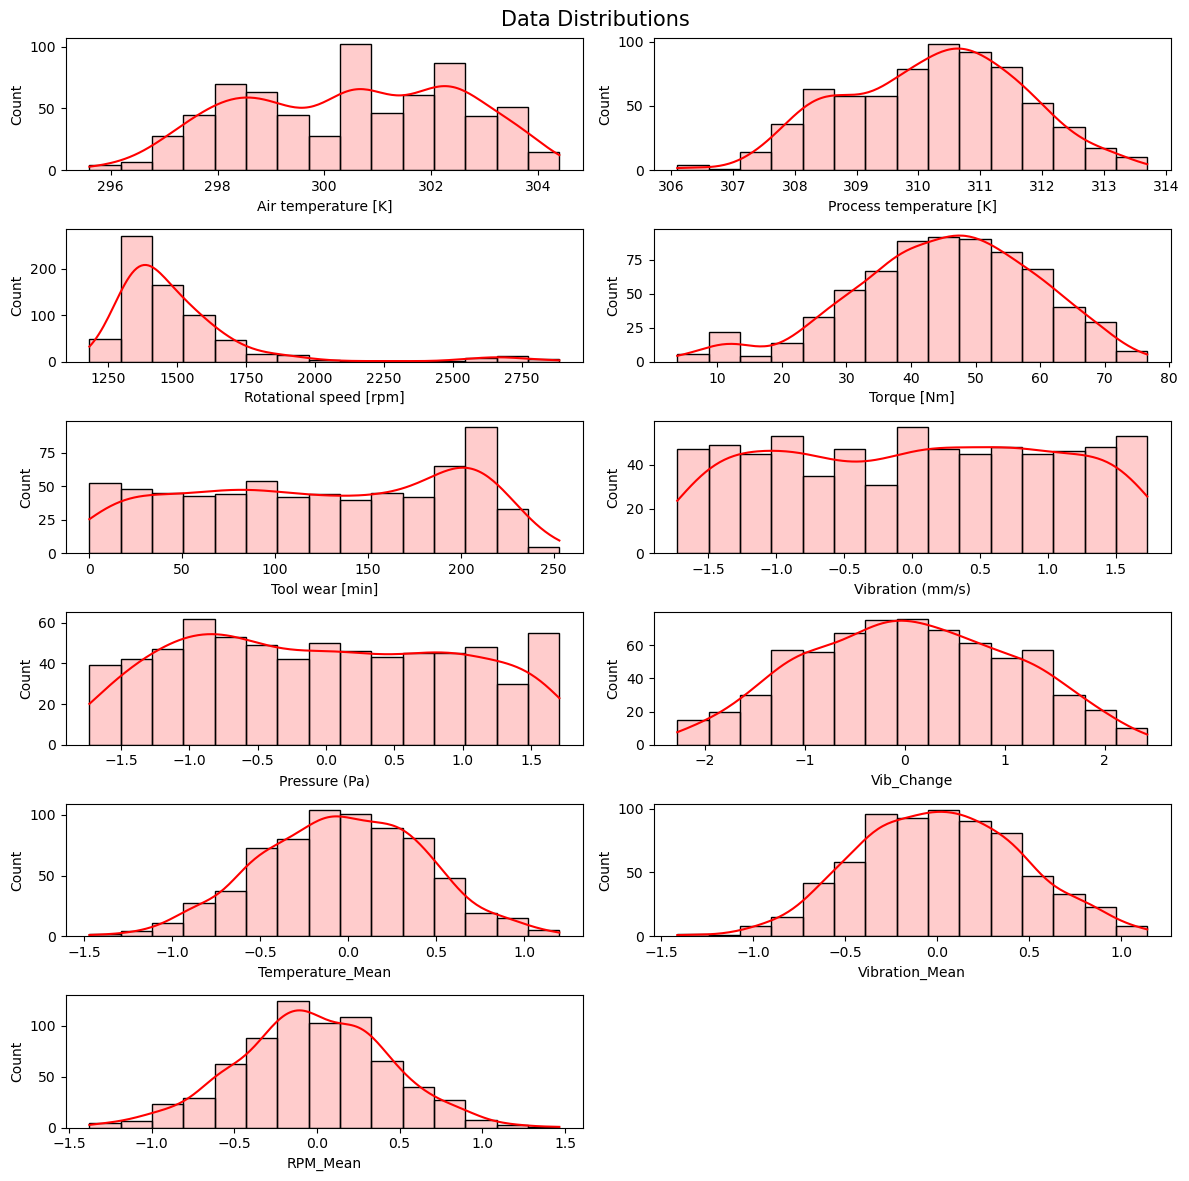

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(6,2, i+1)
    sns.histplot(df, x = col, kde = True, alpha = 0.2, color = 'red', bins = 15)
plt.suptitle("Data Distributions", fontsize = 15)
plt.tight_layout()
plt.show()

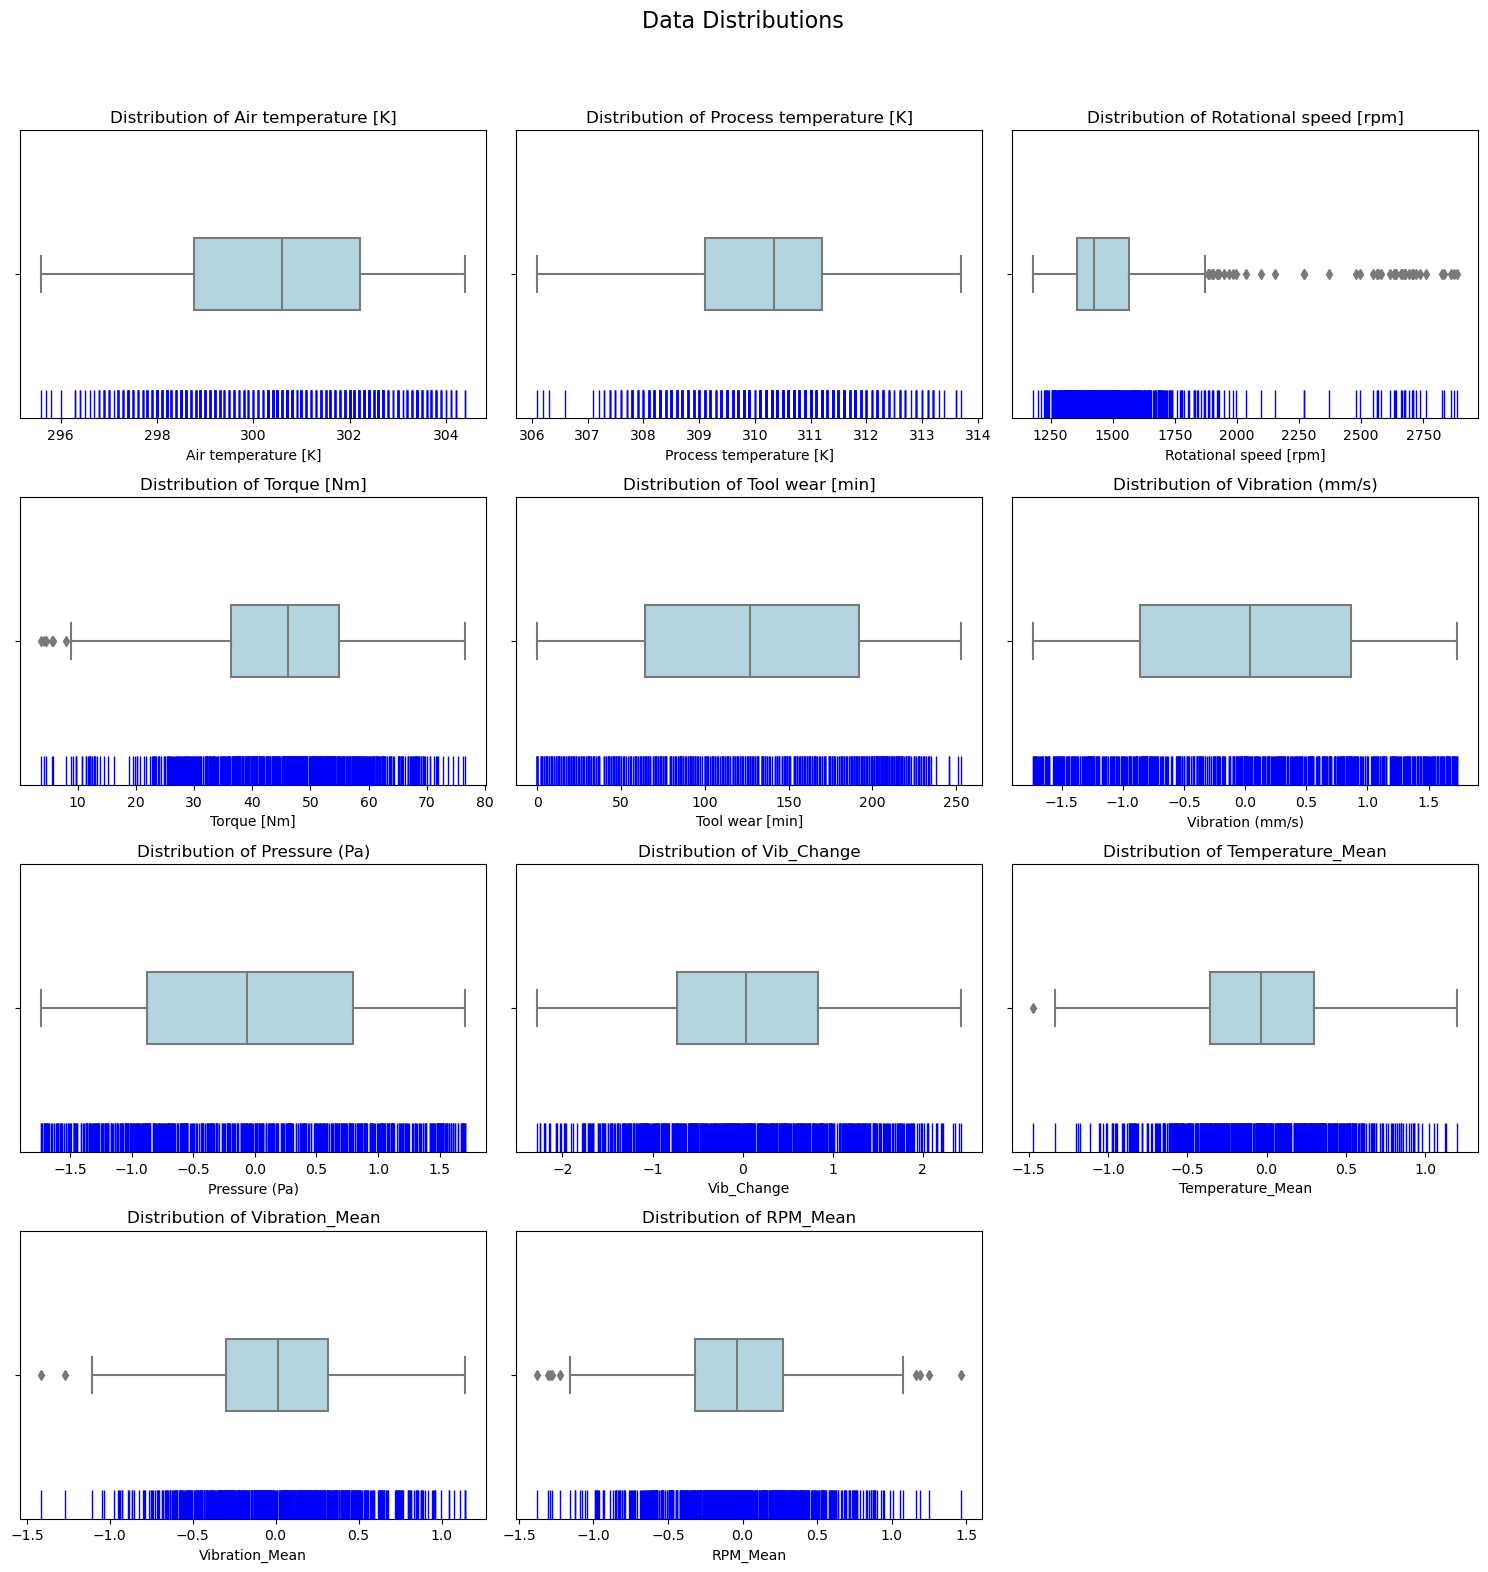

In [14]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  
plt.figure(figsize=(15, 4 * n_rows))  
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.rugplot(data=df, x=col, height=0.1, color='blue')
    sns.boxplot(data=df, x=col, width=0.25, color='lightblue')
    plt.title(f'Distribution of {col}')

plt.suptitle("Data Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


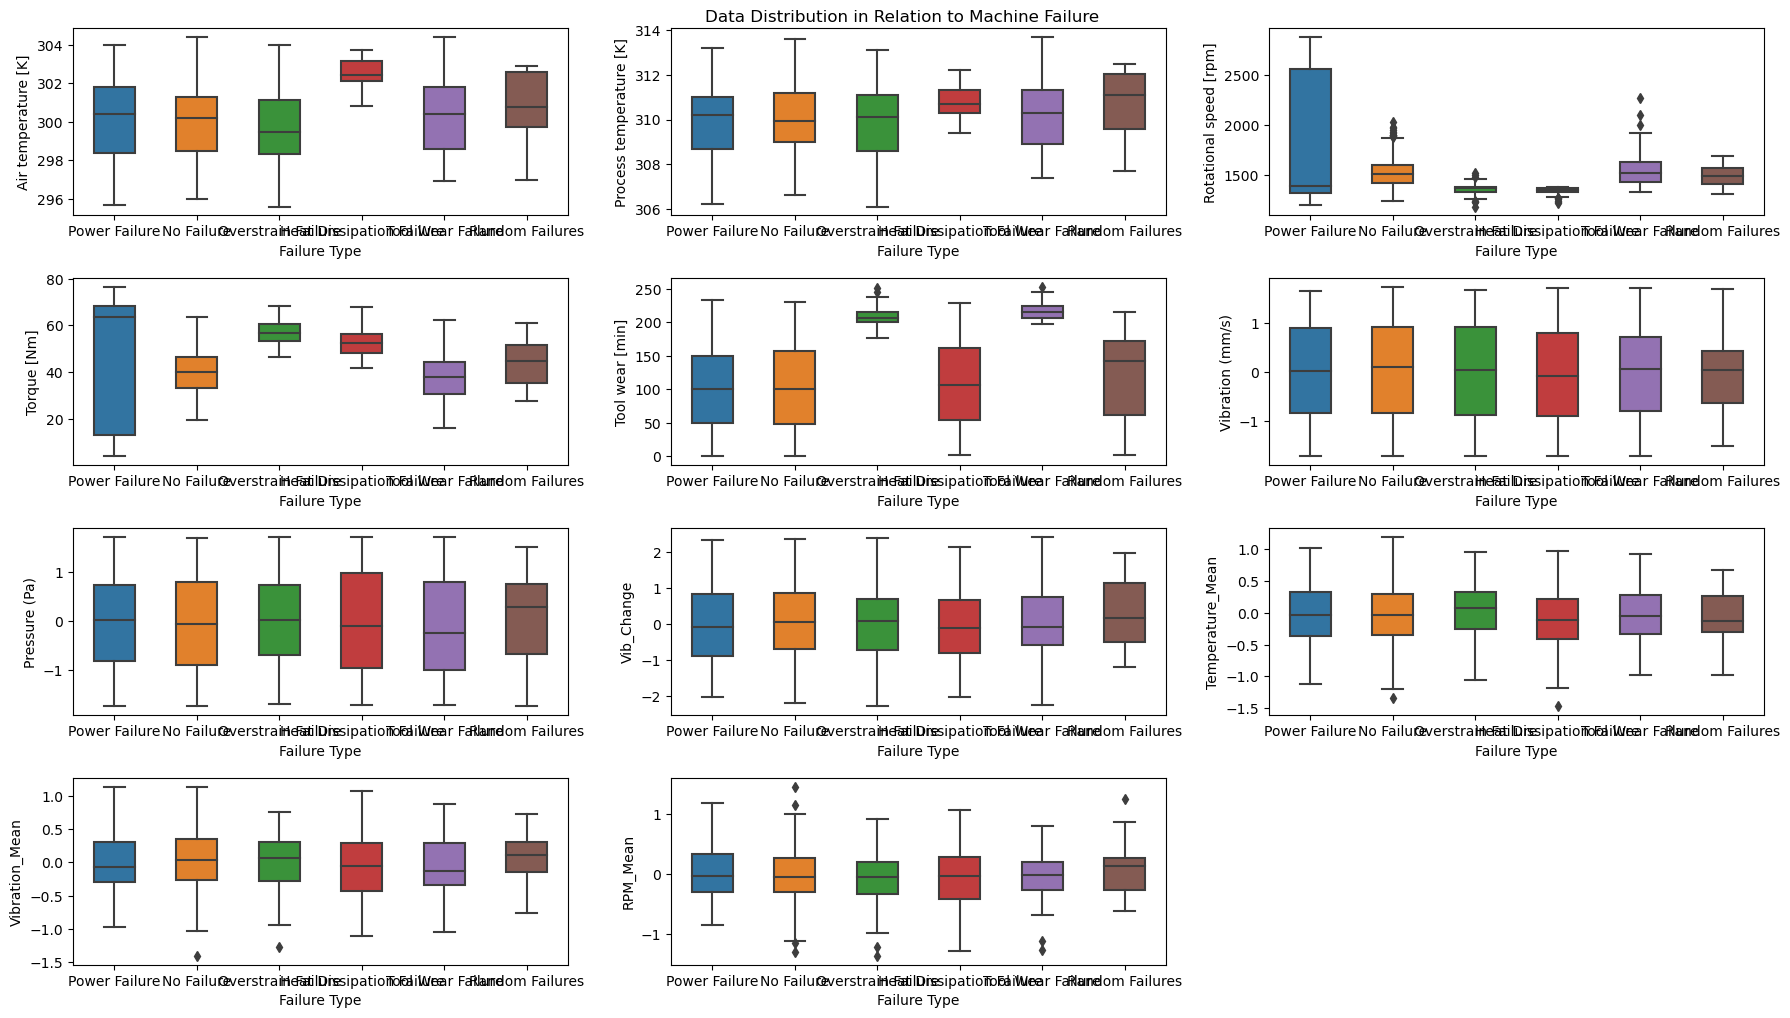

In [15]:
plt.figure(figsize = (18, 15))
for i, col in enumerate(num_cols):
    plt.subplot(6,3, i+1)
    sns.boxplot(df, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

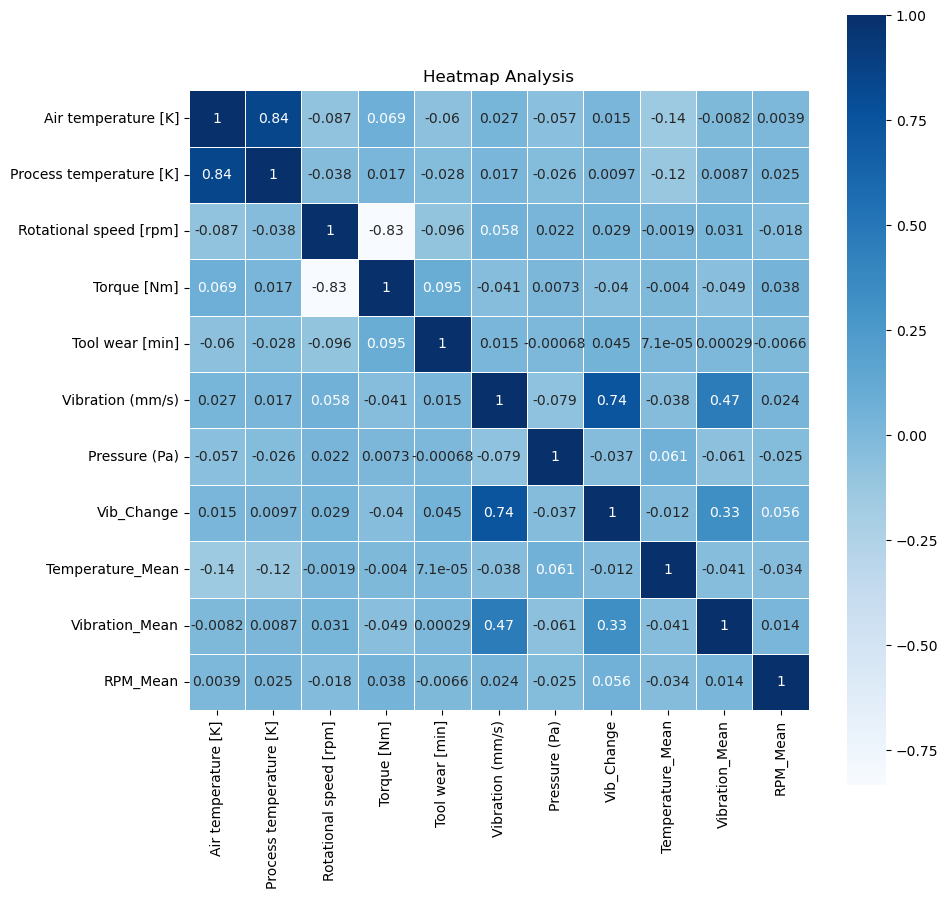

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(df[num_cols].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()

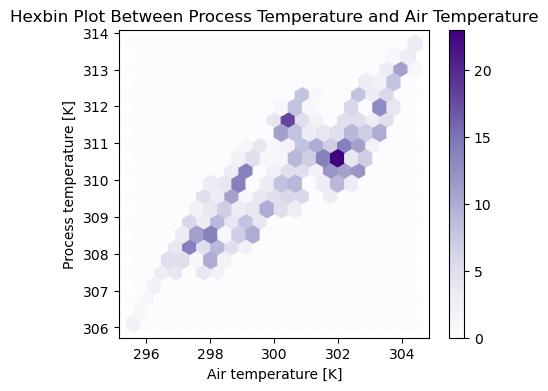

In [17]:
df.plot.hexbin(x='Air temperature [K]', y='Process temperature [K]', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

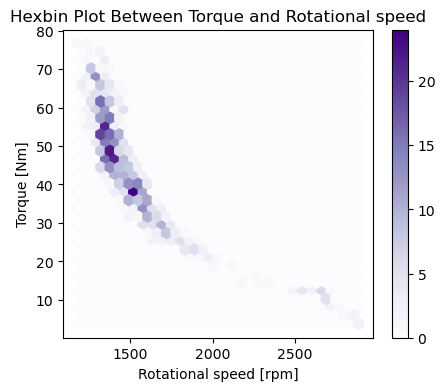

In [18]:
df.plot.hexbin(x='Rotational speed [rpm]',  y='Torque [Nm]', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

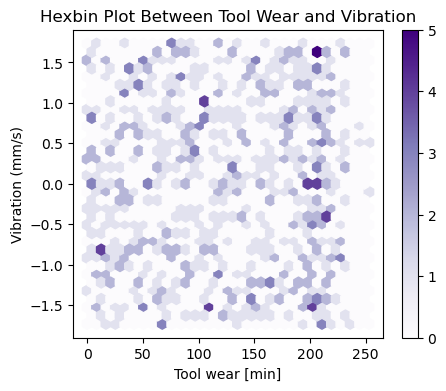

In [19]:
df.plot.hexbin(x='Tool wear [min]',  y='Vibration (mm/s)', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Tool Wear and Vibration")
plt.show()

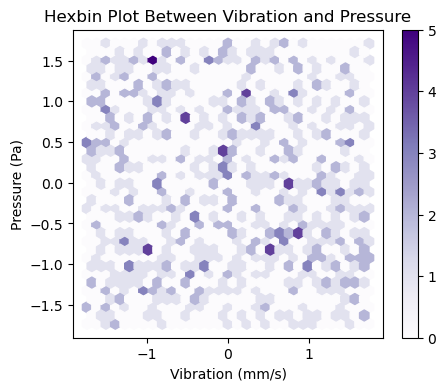

In [20]:
df.plot.hexbin(x='Vibration (mm/s)',  y='Pressure (Pa)', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Vibration and Pressure")
plt.show()

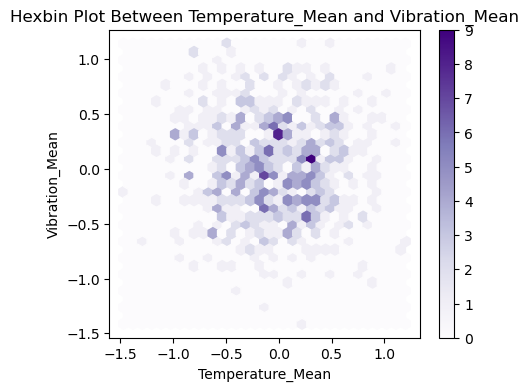

In [21]:
df.plot.hexbin(x='Temperature_Mean',  y='Vibration_Mean', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Temperature_Mean and Vibration_Mean")
plt.show() 

In [22]:
type_machine_failure = df[['Type', 'Failure Type']].pivot_table(index = 'Type', columns='Failure Type', aggfunc= lambda x: len(x), margins = True)

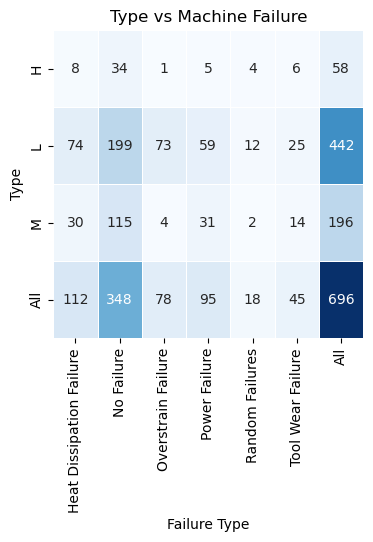

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

Exploratory Data Analysis and Data Preprocessing

In [24]:
df = pd.read_excel("dataset.xlsx")

In [25]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,745.661610,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
1,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
2,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,4019.410836,0.883543,-1.085240,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
3,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
4,5,L51841,L,303.3,311.3,1350,48.1,32,1,Heat Dissipation Failure,...,1639.657411,0.697170,-1.603008,0,0.022523,1.466719,0.595474,0.236426,0.012031,-0.409779


In [26]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
691,692,H29998,H,297.6,309.6,1419,48.2,215,0,No Failure,...,304.247527,0.491922,-1.501159,0,1.514463,1.252707,-0.956359,0.501498,-0.317157,0.216972
692,693,L57175,M,298.8,308.4,1604,29.5,14,0,No Failure,...,2030.402370,-1.162264,1.115479,0,-0.452075,0.180631,0.037652,-0.191070,0.568697,-0.169609
693,694,L49472,L,299.6,308.9,1422,53.2,120,0,No Failure,...,2952.982165,-0.379765,-0.553755,1,0.803727,-0.942655,0.325617,0.049659,-0.666648,-0.576051
694,695,L50637,M,301.5,310.4,2639,12.0,21,1,Power Failure,...,2739.954679,-0.393008,-0.356801,0,0.724075,-0.933124,-0.064861,0.432332,0.251273,-0.357589
695,696,L52236,M,303.9,312.9,1430,53.5,189,0,No Failure,...,4474.827474,-0.094930,1.477832,0,-0.043279,0.318509,0.527417,0.181043,0.164472,0.328743


In [27]:
df=pd.read_excel('dataset.xlsx',header=None) 
df.head
features=df.loc[0,:]
print(features)

0                         UDI
1                  Product ID
2                        Type
3         Air temperature [K]
4     Process temperature [K]
5      Rotational speed [rpm]
6                 Torque [Nm]
7             Tool wear [min]
8                      Target
9                Failure Type
10          operational_hours
11                        RUL
12           Vibration (mm/s)
13              Pressure (Pa)
14       Maintenance Required
15                Temp_Change
16                 Vib_Change
17           Temperature_Mean
18             Vibration_Mean
19              Pressure_Mean
20                   RPM_Mean
Name: 0, dtype: object


Data shape, Data types and NaN values

In [28]:
#shape of the dataset
df.shape

(697, 21)

In [29]:
#dtypes check the data types of our features
#Attribute in Dataframe to check the type of each column in the Dataframe
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
dtype: object

In [30]:
#Get detailed information about the Dataframe about the type
#and null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       697 non-null    object
 1   1       697 non-null    object
 2   2       697 non-null    object
 3   3       697 non-null    object
 4   4       697 non-null    object
 5   5       697 non-null    object
 6   6       697 non-null    object
 7   7       697 non-null    object
 8   8       697 non-null    object
 9   9       697 non-null    object
 10  10      697 non-null    object
 11  11      697 non-null    object
 12  12      697 non-null    object
 13  13      697 non-null    object
 14  14      697 non-null    object
 15  15      697 non-null    object
 16  16      697 non-null    object
 17  17      697 non-null    object
 18  18      697 non-null    object
 19  19      697 non-null    object
 20  20      697 non-null    object
dtypes: object(21)
memory usage: 114.5+ KB


In [31]:
#Checking the total null values in our features
df.notnull().sum()

0     697
1     697
2     697
3     697
4     697
5     697
6     697
7     697
8     697
9     697
10    697
11    697
12    697
13    697
14    697
15    697
16    697
17    697
18    697
19    697
20    697
dtype: int64

In [32]:
df.isnull()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
693,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [34]:
df.describe().T

,count,unique,top,freq
0,697,697,UDI,1
1,697,697,Product ID,1
2,697,4,L,442
3,697.0,86.0,300.7,24.0
4,697,71,311,23
5,697,398,1365,7
6,697.0,386.0,44.4,6.0
7,697,228,215,10
8,697,3,0,366
9,697,7,No Failure,348


Index of the Columns

In [35]:
df.index

RangeIndex(start=0, stop=697, step=1)

In [36]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20],
      dtype='int64')

After data cleaning and processing the final list is as follows

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
1,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,745.66161,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
2,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
3,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,4019.410836,0.883543,-1.08524,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
4,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,692,H29998,H,297.6,309.6,1419,48.2,215,0,No Failure,...,304.247527,0.491922,-1.501159,0,1.514463,1.252707,-0.956359,0.501498,-0.317157,0.216972
693,693,L57175,M,298.8,308.4,1604,29.5,14,0,No Failure,...,2030.40237,-1.162264,1.115479,0,-0.452075,0.180631,0.037652,-0.19107,0.568697,-0.169609
694,694,L49472,L,299.6,308.9,1422,53.2,120,0,No Failure,...,2952.982165,-0.379765,-0.553755,1,0.803727,-0.942655,0.325617,0.049659,-0.666648,-0.576051
695,695,L50637,M,301.5,310.4,2639,12,21,1,Power Failure,...,2739.954679,-0.393008,-0.356801,0,0.724075,-0.933124,-0.064861,0.432332,0.251273,-0.357589


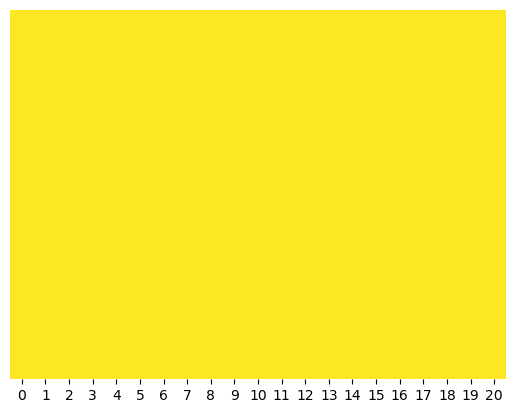

In [38]:
#visualizing the null values in the dataset using a heatmap
#visualization helps to find the distribution of null values in the data
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='viridis_r')
plt.show()

In [39]:
df1 = pd.read_excel("dataset.xlsx")

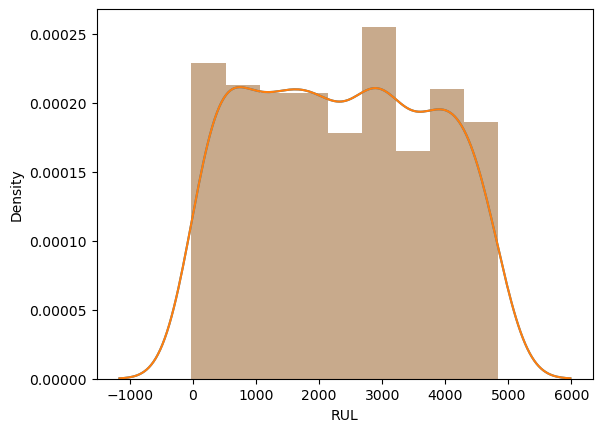

In [40]:
#let's check the distribution of Price feature
# Why we do this?  This distribution should be retained after filling the missing values
sns.distplot(df1['RUL'], kde=True)
sns.distplot(df1['RUL'], hist = True)
plt.show()


In [41]:
#checking the distribution of Price and Rating after imputation
df['operational_hours'] = df1['RUL'].fillna(df1['RUL'].mean())
df['operational_hours'] = df1['RUL'].fillna(25)
#using DataFrame's plot function
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,operational_hours
0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean,745.661610
1,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185,4529.506118
2,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127,4019.410836
3,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,0.883543,-1.08524,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898,389.362128
4,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033,1639.657411


In [42]:
df1['Maintenance Required'].value_counts()

Maintenance Required
0    350
1    346
Name: count, dtype: int64

In [43]:
#we can either impute Embarked feature with mode value as it is categorical variable or
# we can drop the rows where there is missing values as it is very less . For now we will use mode 
df1.fillna('NA',inplace=True)
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,745.661610,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
1,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
2,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,4019.410836,0.883543,-1.085240,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
3,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
4,5,L51841,L,303.3,311.3,1350,48.1,32,1,Heat Dissipation Failure,...,1639.657411,0.697170,-1.603008,0,0.022523,1.466719,0.595474,0.236426,0.012031,-0.409779


Treating outliers

In [44]:
#making the copy of data to showcase how to drop outlier values
df2=df1.copy()

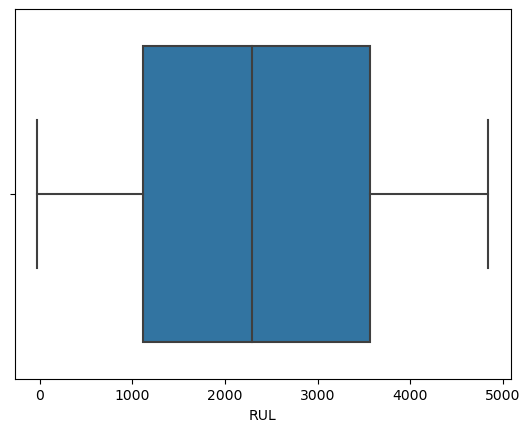

In [45]:
# Boxplot helps to identify the outliers in any feature
#outliers in Rating
#sns.boxplot(df['Rating'])
sns.boxplot(x='RUL', data=df2)
plt.show()

In [46]:
numeric_df2 = df2.select_dtypes(include=['number'])

# Calculating IQR (Inter-Quartile Range) for numeric columns only
Q1 = numeric_df2.quantile(0.25)  # Lower quartile
Q3 = numeric_df2.quantile(0.75)  # Upper quartile
IQR = Q3 - Q1                    # Inter-Quartile Range

print(IQR)

UDI                         347.500000
Air temperature [K]           3.450000
Process temperature [K]       2.100000
Rotational speed [rpm]      208.000000
Torque [Nm]                  18.500000
Tool wear [min]             128.000000
Target                        1.000000
operational_hours          2443.000000
RUL                        2457.113982
Vibration (mm/s)              1.726205
Pressure (Pa)                 1.672194
Maintenance Required          1.000000
Temp_Change                   1.549844
Vib_Change                    1.568131
Temperature_Mean              0.655516
Vibration_Mean                0.620223
Pressure_Mean                 0.653485
RPM_Mean                      0.590495
dtype: float64


In [47]:
# Calculate outlier bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df2_filtered = numeric_df2[(numeric_df2 >= lower_bound) & (numeric_df2 <= upper_bound)].dropna()

# Display the shape of the filtered DataFrame
print("Original shape:", df2.shape)
print("Filtered shape:", df2_filtered.shape)

Original shape: (696, 21)
Filtered shape: (638, 18)


Treating Outliers

In [48]:
Q3 = df2['RUL'].quantile(0.75)
Q1 = df2['RUL'].quantile(0.25)
#IQR=data['Price'].quantile(0.75)-data['Price'].quantile(0.25)
IQR=Q3-Q1
print(IQR)

2457.1139817499998


In [49]:
lower_bridge=Q1-(IQR*1.5)
upper_bridge=Q3+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-2573.4462296249994
7255.009697375


In [50]:
df2[df2.RUL>=3200]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
1,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
2,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,4019.410836,0.883543,-1.085240,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
5,6,L56739,L,299.5,310.9,1496,38.5,162,0,No Failure,...,3647.168782,-1.524112,-1.366363,0,1.602528,-1.258694,-0.037301,-0.354013,-0.519838,0.260849
7,8,L52812,L,302.7,312.2,1376,52.8,164,0,No Failure,...,3925.925573,-1.206256,-1.041916,0,0.602044,-0.671420,0.369804,-0.318444,-0.311681,0.418345
8,9,L54184,L,300.5,310.6,1950,20.3,208,0,No Failure,...,3829.181907,0.484391,-0.862086,0,-2.162068,1.185748,-0.277928,0.135752,0.283046,-0.629627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,679,L55372,L,299.6,310.9,1229,65.2,209,1,Overstrain Failure,...,4076.836141,0.735625,1.671924,1,-0.167875,-0.600308,-0.563131,0.759605,0.192111,-0.808831
679,680,L53869,L,301.7,311.0,1546,43.0,23,0,No Failure,...,4736.556533,0.007174,-0.376990,0,-0.708680,0.912029,0.345128,0.059415,-0.254217,0.411417
686,687,L55154,L,301.2,312.3,1528,38.4,85,0,No Failure,...,4737.654411,-1.235012,0.191014,1,-0.826828,-1.089066,-0.492068,-0.334281,0.381640,0.950414
689,690,L53339,L,301.0,311.0,1399,58.0,190,1,Overstrain Failure,...,3391.650220,-1.265179,-1.578207,1,0.837531,0.080887,-0.388545,-0.245919,-0.098947,0.266392


In [51]:
df2[(df2.RUL>=1500) & (df2.RUL<=3200)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
4,5,L51841,L,303.3,311.3,1350,48.1,32,1,Heat Dissipation Failure,...,1639.657411,0.697170,-1.603008,0,0.022523,1.466719,0.595474,0.236426,0.012031,-0.409779
9,10,L52519,M,303.4,312.7,1594,32.8,79,0,No Failure,...,2022.860753,0.801817,-1.009936,1,-1.912054,1.172821,-0.600423,-0.598359,-0.815900,-0.133584
10,11,L51594,L,302.7,310.5,1520,39.3,73,0,No Failure,...,1724.218688,1.150785,-0.083413,1,1.112684,0.868033,-0.590457,0.355842,0.108845,-0.156677
11,12,L48278,M,296.9,307.4,1521,37.9,27,0,No Failure,...,1705.955703,-0.328866,-0.561948,0,-0.859881,0.877620,0.117271,-0.385714,0.283949,0.070561
13,14,L52114,L,303.4,312.2,1580,35.8,90,0,No Failure,...,2347.864932,-0.331493,0.127928,1,-0.912263,-0.073242,-0.865263,0.062744,0.577884,0.328282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,681,L55379,L,299.2,310.7,1737,27.0,225,1,Tool Wear Failure,...,2497.429815,0.465311,-0.630846,0,1.633264,-0.451626,-0.067951,0.162725,0.418077,0.059938
688,689,L53539,L,300.1,309.8,1430,56.7,44,0,No Failure,...,1633.955087,0.798049,-1.208480,1,-0.628861,0.338897,0.601588,0.298133,-0.300144,-1.075789
692,693,L57175,M,298.8,308.4,1604,29.5,14,0,No Failure,...,2030.402370,-1.162264,1.115479,0,-0.452075,0.180631,0.037652,-0.191070,0.568697,-0.169609
693,694,L49472,L,299.6,308.9,1422,53.2,120,0,No Failure,...,2952.982165,-0.379765,-0.553755,1,0.803727,-0.942655,0.325617,0.049659,-0.666648,-0.576051


In [52]:
df2[(df2.RUL<=1500)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,745.661610,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
3,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
6,7,L51750,L,302.8,310.9,1312,52.2,40,1,Heat Dissipation Failure,...,352.217368,-1.305100,-0.690433,0,-2.024333,-1.457581,-0.556274,-0.431079,-0.752388,-0.485063
12,13,L51364,L,302.2,310.6,1334,53.2,159,1,Heat Dissipation Failure,...,1146.091801,-1.236213,1.447131,0,-0.008164,-1.490193,-0.348250,0.055080,0.348917,1.073732
14,15,L52156,L,303.7,312.7,1359,56.8,194,1,Overstrain Failure,...,216.766904,0.099792,0.215122,1,1.320209,-0.407917,0.762093,0.671240,-0.338084,0.358303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,685,L51228,L,301.9,311.0,2691,12.1,31,1,Power Failure,...,82.152051,-0.120935,0.047245,1,-1.928890,-0.645858,-0.351717,-0.105909,0.812915,-0.206559
685,686,L53797,L,301.6,310.6,1321,60.8,73,0,No Failure,...,974.027654,0.903118,1.438217,0,0.196539,1.207438,-0.644350,-0.229854,0.519444,-0.384839
687,688,L51299,L,302.1,310.7,1325,45.1,208,1,Heat Dissipation Failure,...,307.548718,-1.447248,-1.198777,1,0.165728,-2.018551,-0.410283,-1.107851,-0.359300,0.479312
690,691,L49773,H,298.9,308.5,1415,54.0,6,0,No Failure,...,882.385511,-1.485332,0.865768,1,1.937026,-0.186545,-0.447666,-0.412021,0.744344,0.313964


Analyse the relation between target variables and the categorical variables in the dataset


The categorical variables considered are operational_hours and RUL

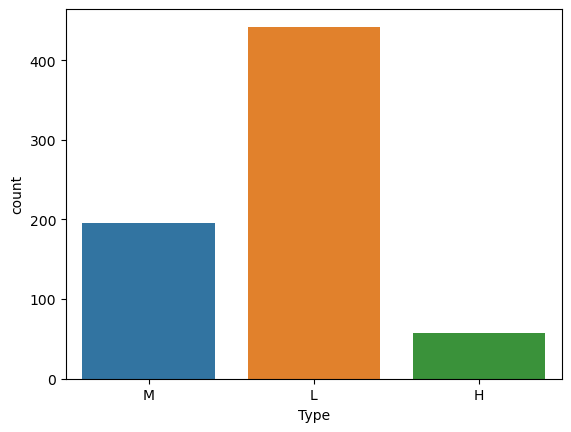

In [53]:
# Number of operational_hours in the dataset using plot
# Tells how operational_hours is distributed over the dataset
sns.countplot(x='Type', data=df2)
plt.show()

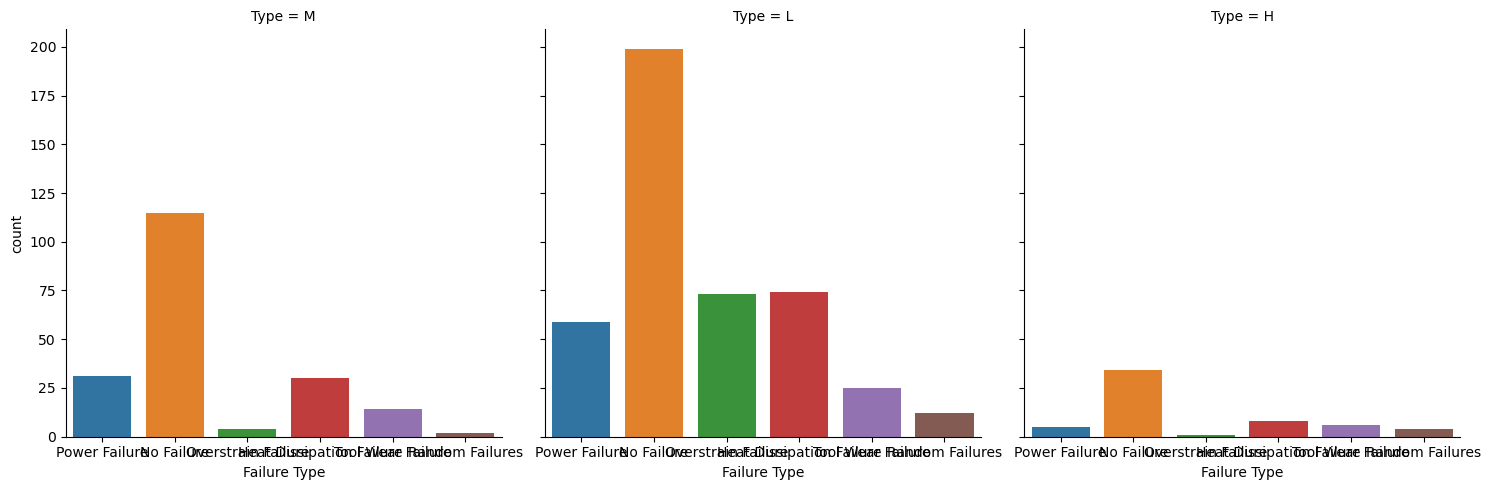

In [54]:
sns.catplot(x='Failure Type', col='Type', kind='count', data=df2)   #factor plot()
plt.show()

Final Conclusion

In [55]:
data = df2[~(df2.isnull())]
data.drop
print(data[~(data.isnull())])

     UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0      1     L56106    M                297.3                    308.3   
1      2     L54029    L                301.1                    311.3   
2      3     L53258    L                300.8                    310.7   
3      4     L50530    L                301.4                    310.8   
4      5     L51841    L                303.3                    311.3   
..   ...        ...  ...                  ...                      ...   
691  692     H29998    H                297.6                    309.6   
692  693     L57175    M                298.8                    308.4   
693  694     L49472    L                299.6                    308.9   
694  695     L50637    M                301.5                    310.4   
695  696     L52236    M                303.9                    312.9   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                      1459         59.6  

In [56]:
# Save cleaned and processed data to a CSV file
df2.to_csv('final_dataset.csv', index=False)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [58]:
file_path = 'final_dataset.csv'  
data = pd.read_csv(file_path)

In [59]:
data = data.select_dtypes(include=[float, int])  
data = data.fillna(data.median())  

In [60]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [61]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

IsolationForest(contamination=0.01)

In [62]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

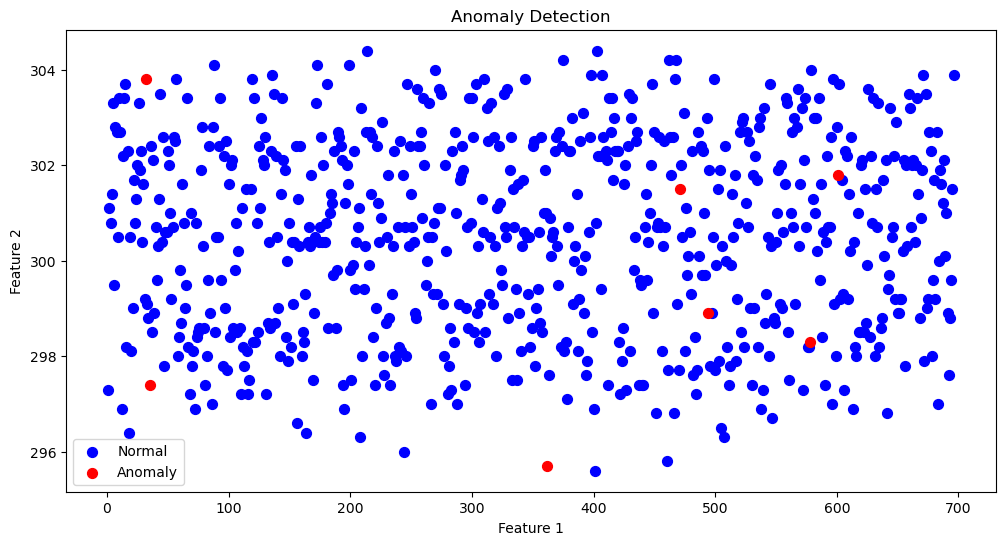

In [63]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting normal points
normal_data = data[data['Anomaly'] == 1]
plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], c='blue', label='Normal', s=50)

# Plotting anomalies
anomalies_data = data[data['Anomaly'] == -1]
plt.scatter(anomalies_data.iloc[:, 0], anomalies_data.iloc[:, 1], c='red', label='Anomaly', s=50)

plt.title('Anomaly Detection')
plt.xlabel('Feature 1')  # Replace with actual feature names
plt.ylabel('Feature 2')  # Replace with actual feature names
plt.legend()
plt.show()

In [64]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,operational_hours,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean,Anomaly
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,348.500000,300.487069,310.226437,1512.379310,45.056322,123.829023,0.474138,2618.890805,2342.113825,0.021720,-0.033499,0.497126,-0.035329,0.051595,-0.035737,0.016052,-0.011829,-0.027471,0.979885
std,201.062179,2.022437,1.424500,288.261142,14.175301,70.614555,0.499690,1406.915802,1407.522819,1.016220,0.977088,0.500351,1.014309,1.035693,0.457295,0.441527,0.450070,0.455050,0.199706
min,1.000000,295.600000,306.100000,1181.000000,3.800000,0.000000,0.000000,118.000000,-24.848123,-1.729951,-1.731001,0.000000,-2.378777,-2.277372,-1.470536,-1.412127,-1.156276,-1.376002,-1.000000
25%,174.750000,298.775000,309.100000,1356.000000,36.425000,64.000000,0.000000,1392.000000,1112.224743,-0.860757,-0.873398,0.000000,-0.799846,-0.733165,-0.357651,-0.301843,-0.347501,-0.315905,1.000000
50%,348.500000,300.600000,310.350000,1426.500000,46.100000,127.000000,0.000000,2665.000000,2289.584036,0.038385,-0.066884,0.000000,-0.018222,0.035494,-0.036913,0.013917,0.014348,-0.034283,1.000000
75%,522.250000,302.225000,311.200000,1564.000000,54.925000,192.000000,1.000000,3835.000000,3569.338725,0.865448,0.798796,1.000000,0.749998,0.834966,0.297865,0.318380,0.305984,0.274590,1.000000
max,696.000000,304.400000,313.700000,2886.000000,76.600000,253.000000,1.000000,4995.000000,4841.729779,1.731966,1.706937,1.000000,2.333349,2.424051,1.199894,1.142468,1.199650,1.465856,1.000000


In [65]:
from sklearn.svm import OneClassSVM

In [66]:
# Initialize and fit the model
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
model.fit(data)

# Predict anomalies
y_pred = model.predict(data)

In [67]:
import numpy as np
anomaly_values=data.iloc[np.where(y_pred==-1)]
print(anomaly_values)

     UDI  Air temperature [K]  Process temperature [K]  \
0      1                297.3                    308.3   
1      2                301.1                    311.3   
6      7                302.8                    310.9   
7      8                302.7                    312.2   
8      9                300.5                    310.6   
..   ...                  ...                      ...   
690  691                298.9                    308.5   
691  692                297.6                    309.6   
692  693                298.8                    308.4   
694  695                301.5                    310.4   
695  696                303.9                    312.9   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                      1459         59.6              207       1   
1                      1498         37.6               11       0   
6                      1312         52.2               40       1   
7                      1376

In [68]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [69]:
# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [70]:
# Preprocess the data
# Example: Drop non-numeric columns and fill missing values if necessary
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

In [71]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [72]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

IsolationForest(contamination=0.01)

In [73]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

In [75]:
# -1 for anomalies, 1 for normal points
print(data)

# Save the results to a new CSV file
output_file = 'D:/HACKERA/results.csv'
data.to_csv(output_file, index=False)

     UDI  Air temperature [K]  Process temperature [K]  \
0      1                297.3                    308.3   
1      2                301.1                    311.3   
2      3                300.8                    310.7   
3      4                301.4                    310.8   
4      5                303.3                    311.3   
..   ...                  ...                      ...   
691  692                297.6                    309.6   
692  693                298.8                    308.4   
693  694                299.6                    308.9   
694  695                301.5                    310.4   
695  696                303.9                    312.9   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                      1459         59.6              207       1   
1                      1498         37.6               11       0   
2                      1339         59.1              203       1   
3                      1285